In [14]:
!apt-get install zstd
!unzstd CS48002_rPlace_data/2022-compact.csv.zst

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  zstd
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 278 kB of archives.
After this operation, 1,141 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 zstd amd64 1.3.3+dfsg-2ubuntu1.2 [278 kB]
Fetched 278 kB in 1s (436 kB/s)
Selecting previously unselected package zstd.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../zstd_1.3.3+dfsg-2ubuntu1.2_amd64.deb ...
Unpacking zstd (1.3.3+dfsg-2ubuntu1.2) ...
Setting up zstd (1.3.3+dfsg-2ubuntu1.2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
CS48002_rPlace_data/2022-compact.csv.zst: 5615366190 bytes 


In [1]:
!ls -ahl

total 2,9G
drwxr-xr-x  3 eak users    6 Haz 22 20:15 .
drwxr-xr-x 12 eak users   10 Haz 22 16:39 ..
-rw-r--r--  1 eak users 5,3G Haz 22 17:35 2022-compact.csv
-rw-r--r--  1 eak users  68K Haz 22 17:00 data.csv
-rw-r--r--  1 eak users 864K Haz 22 16:58 data.zip
drwxr-xr-x  2 eak users    1 Haz 22 16:50 .ipynb_checkpoints
-rw-r--r--  1 eak users 7,1K Haz 22 20:17 jupyter-769217.out
-rw-r--r--  1 eak users  22K Haz 22 19:18 rPlace_NetSci.ipynb


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
PATH =  "./2022-compact.csv"
df = pd.read_csv(PATH)

In [4]:
df.columns

Index(['timestamp', 'user_hash', 'color', 'x_coordinate', 'y_coordinate',
       'x2_coordinate', 'y2_coordinate'],
      dtype='object')

In [5]:
df['y2_coordinate']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
             ..
160353099   NaN
160353100   NaN
160353101   NaN
160353102   NaN
160353103   NaN
Name: y2_coordinate, Length: 160353104, dtype: float64

In [6]:
# bcs it is empty in the data, no need
df.drop('x2_coordinate', axis=1, inplace=True)
df.drop('y2_coordinate', axis=1, inplace=True)

In [7]:
unique_users = df['user_hash'].unique()
print('Number of users participated to event is: ', len(unique_users))

Number of users participated to event is:  10381163


In [8]:
value_counts = df.user_hash.value_counts()

In [9]:
# x = plt.hist(value_counts[value_counts > 20], bins=100)

print(f"Totally {len(value_counts)} number of user is participated to tile event. Moreover, {len(value_counts[value_counts < 50])} number of people \n placed more than 50 tiles, which is equal to {sum(value_counts[value_counts < 50])} totally." )

Totally 10381163 number of user is participated to tile event. Moreover, 9611718 number of people 
 placed more than 50 tiles, which is equal to 87803612 totally.


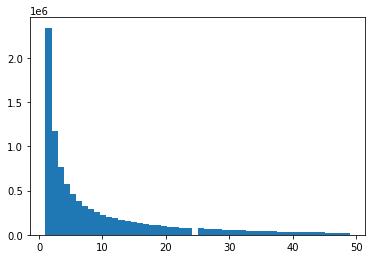

In [14]:
x = plt.hist(value_counts[value_counts < 50], bins=50)

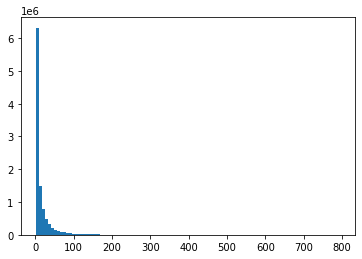

In [11]:
x = plt.hist(value_counts, bins=100)

In [12]:
max(df['x_coordinate']), max(df['y_coordinate'])

(1999, 1999)

In [15]:
event_coordinates = [
    [(300,319),(431,319),(300,398),(431,398)],
    [(300,344),(479,344),(300,448),(479,448)],
    [(1724,1173),(1882,1173),(1724,1328),(1882,1328)],
    [(682,682),(772,682),(682,772),(772,772)],
    [(321, 314), (321, 324), (331, 321), (331, 324)],
    [(1201, 701), (1201, 772), (1201, 701), (1328, 772)]
]

time_frames = [
    (1648852080000, 1648853520000),
    (1648953060000, 1648956000000),
    (1649020140000, 1649024100000),
    (1648956660000, 1648959840000),
    (1648834740000, 1648836660000),
    (1648921140000, 1648927260000)
]

In [16]:
df.columns

Index(['timestamp', 'user_hash', 'color', 'x_coordinate', 'y_coordinate'], dtype='object')

In [17]:
edges = []
nodes = []
look_up_table = dict()

i = 0
for i in range(6):
    
    print(f'Event {i+1}')

    event_i = df[
        (df.x_coordinate >= event_coordinates[i][0][0]) & 
        (df.x_coordinate <=  event_coordinates[i][1][0]) & 
        (df.y_coordinate >=  event_coordinates[i][0][1]) &
        (df.y_coordinate <=  event_coordinates[i][1][1])
    ]


    event_i = event_i[
        (event_i.timestamp >= time_frames[i][0]) &
        (event_i.timestamp >= time_frames[i][1])
    ]
    
    event_i.to_csv(f'event_{i}.csv')
    
    continue
    unique_users = event_i.user_hash.unique()
    for j,each_user in enumerate(unique_users):

        if j % int((len(unique_users) / 20)) == 0:
            print(f'%{j / len(unique_users) * 100}')

        user_tiles = event_i[event_i.user_hash == each_user]
        if look_up_table.get(each_user):
            nodes.append(each_user)
            look_up_table[each_user] = True

        for other_user in unique_users:

            if other_user == each_user:
                continue

            if len(user_tiles) > 2:
                edges.append((each_user, other_user, user_tiles))

            if look_up_table.get(other_user):
                nodes.append(other_user)
                look_up_table[other_user] = True
                
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

Event 1
Event 2
Event 3
Event 4
Event 5
Event 6


In [18]:
!ls

2022-compact.csv  event_1.csv	event_3.csv	    rPlace_NetSci.ipynb
data.csv	  event_1.gexf	event_4.csv
data.zip	  event_2.csv	event_5.csv
event_0.csv	  event_2.gexf	jupyter-769365.out


In [117]:
graph.number_of_edges() 

307714

In [118]:
graph.number_of_nodes() 

6582

In [119]:
nx.write_gexf(graph, "event_2.gexf")

In [106]:
!ls

2022-compact.csv  data.zip	jupyter-769217.out
data.csv	  event_1.gexf	rPlace_NetSci.ipynb


In [ ]:
event_coordinates = [
[(300,319),(431,319),(300,398),(431,398)],
[(300,344),(479,344),(300,448),(479,448)],
[(1724,1173),(1882,1173),(1724,1328),(1882,1328)],
[(682,682),(772,682),(682,772),(772,772)]
]

time_frames = [
(1648852080000, 1648853520000),
(1648953060000, 1648956000000),
(1649020140000, 1649024100000),
(1648956660000, 1648959840000)
]